In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#Extract Data
data = pd.read_csv('kmeans_data.txt', sep='  ',names=['x','y'],header=None)
train_data = np.array(data)
print(train_data)

[[-0.65224338 -0.75800961]
 [ 3.8584055   2.0623607 ]
 [-1.6328513   5.3827894 ]
 ...
 [-3.1250826  -4.6770166 ]
 [ 0.94902872  0.3151896 ]
 [-1.0567392   5.3125869 ]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5392\2884576350.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('kmeans_data.txt', sep='  ',names=['x','y'],header=None)


In [3]:
# Defining data
feature_matrix = np.array(data)
print(len(feature_matrix))

1012


In [4]:
# Rbf_kernel
def rbf_kernel(xn, xm, gamma):
    distance = np.linalg.norm(xn - xm)
    return np.exp(-gamma * (distance ** 2))

In [5]:
# Compute Landmarks from training_data
def compute_landmarks(feature_matrix,num_landmarks):
    random_index = random.randint(0, len(feature_matrix)-1)
    print("Landmarks : ",feature_matrix[random_index])
    return [feature_matrix[random_index]]

In [6]:
# Find Phi_value of each train_input
def compute_new_feature(feature_matrix,landmarks):
    feature_vector = []
    for x_value in feature_matrix:
        phi_x_value = []
        for landmark in landmarks:
            k_value = rbf_kernel(x_value,landmark,0.1)
            phi_x_value.append(k_value)
        feature_vector.append(phi_x_value)
    return feature_vector

In [7]:
# Function to calculate Euclidean distance
def euclidean_distance(point, centroid):
    return np.sqrt(sum((point - centroid) ** 2))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Landmarks :  [0.14113292 1.5268244 ]
[0.68206513] [0.12291517]
[0.68605854] [0.1266638]
[0.68836893] [0.12878233]
[0.6889464] [0.12931253]
[0.6889464] [0.12931253]
[0.6889464] [0.12931253]
[0.6889464] [0.12931253]
[0.6889464] [0.12931253]
[0.6889464] [0.12931253]
[0.6889464] [0.12931253]


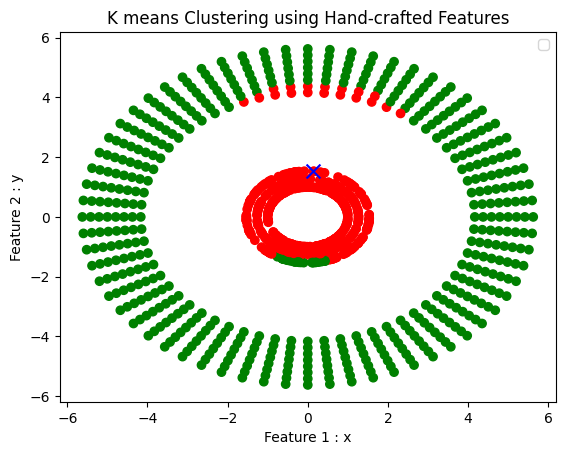

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Landmarks :  [-0.20699007 -0.97834304]
[0.79720738] [0.11039703]
[0.79720738] [0.11039703]
[0.79720738] [0.11039703]
[0.79720738] [0.11039703]
[0.79720738] [0.11039703]
[0.79720738] [0.11039703]
[0.79720738] [0.11039703]
[0.79720738] [0.11039703]
[0.79720738] [0.11039703]
[0.79720738] [0.11039703]


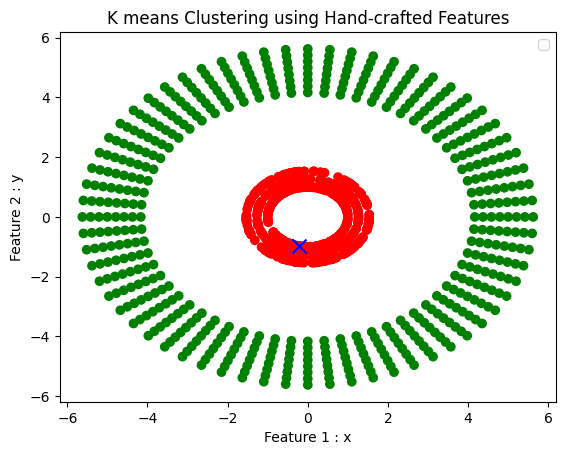

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Landmarks :  [-0.40840475  4.146603  ]
[0.03248651] [0.35608566]
[0.05382696] [0.4381116]
[0.06897776] [0.49032456]
[0.07650783] [0.5178545]
[0.0811089] [0.53462058]
[0.08366031] [0.54383677]
[0.08480702] [0.54806149]
[0.08509843] [0.54911812]
[0.08509843] [0.54911812]
[0.08509843] [0.54911812]


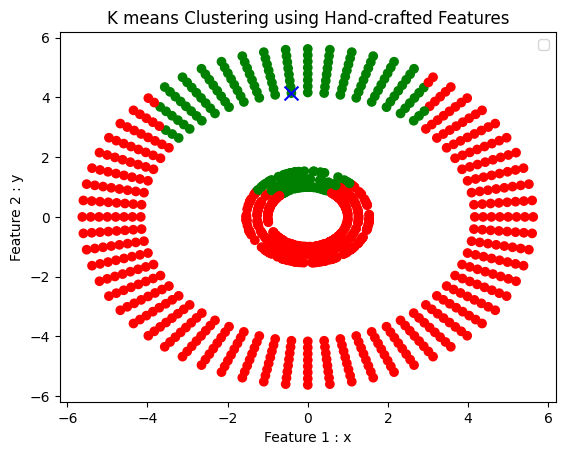

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Landmarks :  [-4.7916667e+00  5.8680992e-16]
[0.32993173] [0.02328109]
[0.43748086] [0.04426075]
[0.54295718] [0.0624555]
[0.63876661] [0.07462496]
[0.72244709] [0.08318305]
[0.75644436] [0.08646475]
[0.75644436] [0.08646475]
[0.75644436] [0.08646475]
[0.75644436] [0.08646475]
[0.75644436] [0.08646475]


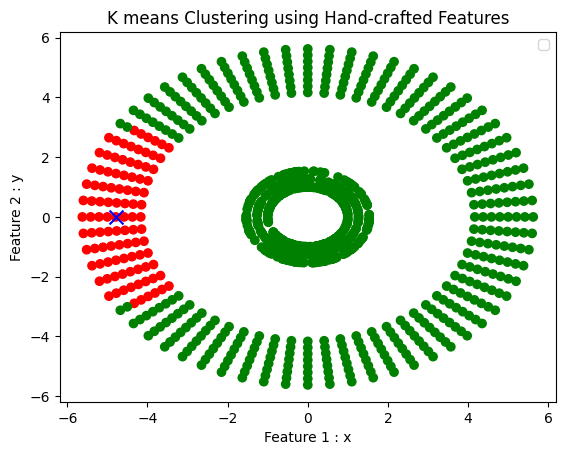

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Landmarks :  [-4.6995961  -0.93480779]
[0.34704318] [0.02674782]
[0.4403745] [0.04624688]
[0.53531555] [0.06275761]
[0.65110578] [0.07672481]
[0.72244709] [0.0839443]
[0.75644436] [0.08721766]
[0.75644436] [0.08721766]
[0.75644436] [0.08721766]
[0.75644436] [0.08721766]
[0.75644436] [0.08721766]


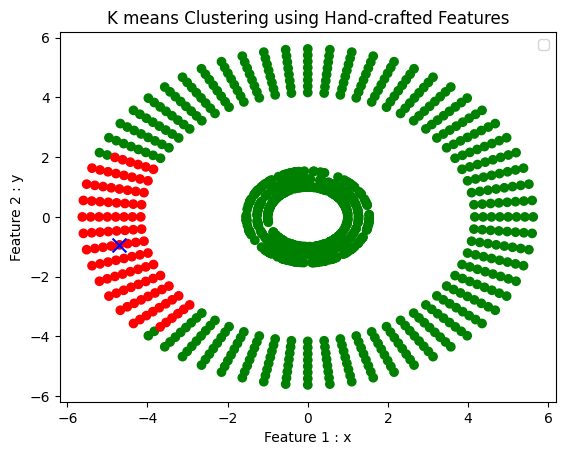

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Landmarks :  [-2.4551913 -4.5933399]
[0.32017443] [0.02133074]
[0.4746636] [0.04438826]
[0.66499396] [0.06171434]
[0.72033696] [0.06600597]
[0.73413408] [0.067363]
[0.73413408] [0.067363]
[0.73413408] [0.067363]
[0.73413408] [0.067363]
[0.73413408] [0.067363]
[0.73413408] [0.067363]


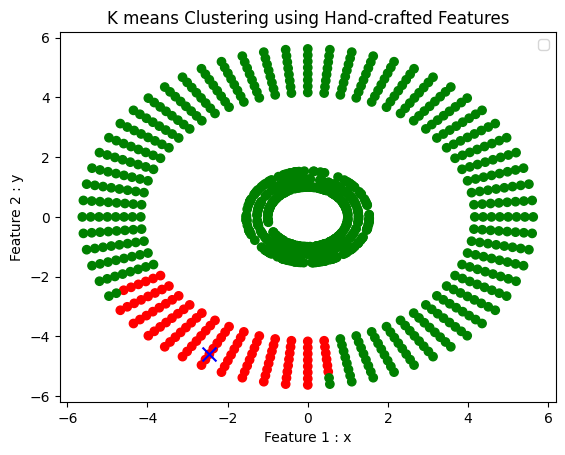

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Landmarks :  [ 4.6995961  -0.93480779]
[0.05678388] [0.48368726]
[0.07063978] [0.5753189]
[0.07959212] [0.65174293]
[0.0868275] [0.72244709]
[0.09006924] [0.75644436]
[0.09006924] [0.75644436]
[0.09006924] [0.75644436]
[0.09006924] [0.75644436]
[0.09006924] [0.75644436]
[0.09006924] [0.75644436]


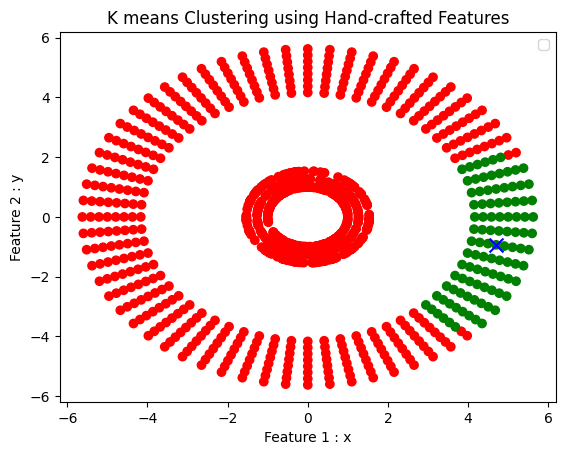

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Landmarks :  [0.39268309 0.91967385]
[0.77104136] [0.11039703]
[0.77104136] [0.11039703]
[0.77104136] [0.11039703]
[0.77104136] [0.11039703]
[0.77104136] [0.11039703]
[0.77104136] [0.11039703]
[0.77104136] [0.11039703]
[0.77104136] [0.11039703]
[0.77104136] [0.11039703]
[0.77104136] [0.11039703]


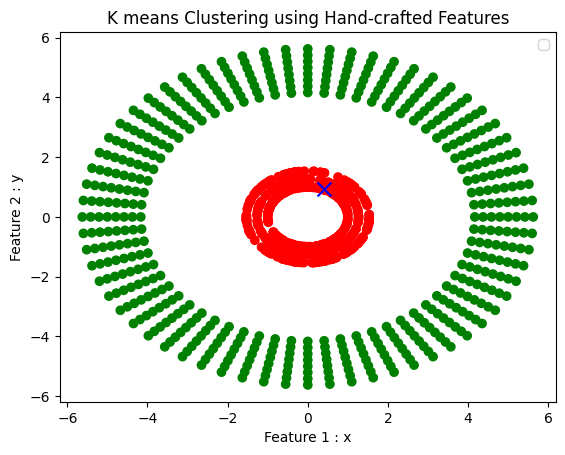

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Landmarks :  [ 0.87411004 -0.91672029]
[0.77712105] [0.13382056]
[0.76092415] [0.11697024]
[0.76092415] [0.11697024]
[0.76092415] [0.11697024]
[0.76092415] [0.11697024]
[0.76092415] [0.11697024]
[0.76092415] [0.11697024]
[0.76092415] [0.11697024]
[0.76092415] [0.11697024]
[0.76092415] [0.11697024]


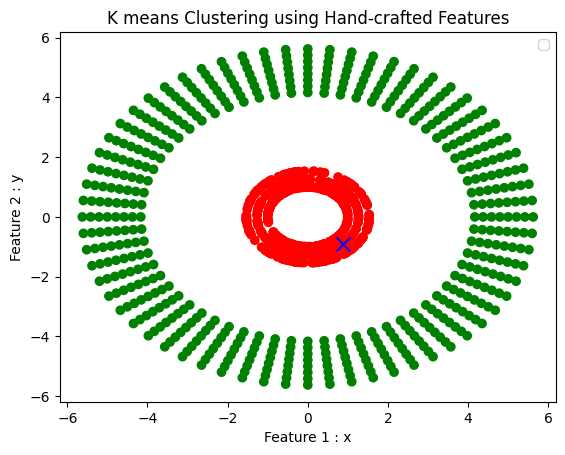

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Landmarks :  [ 4.9608071 -2.6516066]
[0.01459061] [0.2821587]
[0.03502214] [0.48466573]
[0.04419627] [0.63474905]
[0.04722396] [0.67645574]
[0.04855357] [0.68949891]
[0.04994199] [0.70295711]
[0.05275242] [0.73281268]
[0.05275242] [0.73281268]
[0.05275242] [0.73281268]
[0.05275242] [0.73281268]


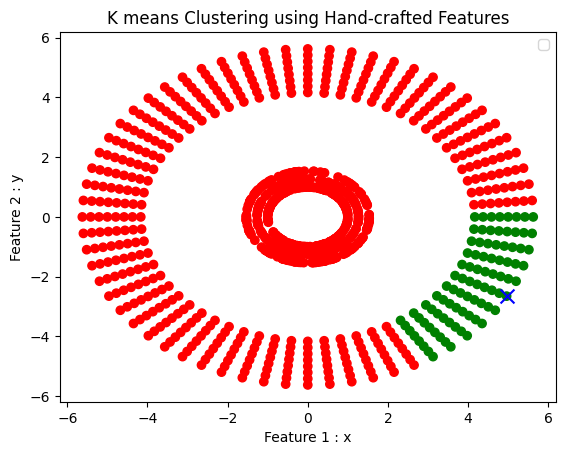

In [10]:
# Running K Means Clustering using RBF Kernels for 10 iteration for different landmarks

for i in range(10):

    num_landmarks = 1
    landmarks = compute_landmarks(feature_matrix,num_landmarks)
    transformed_feature_matrix = np.array(compute_new_feature(feature_matrix,landmarks))

    #Initialise Centroid
    centroids = [list(transformed_feature_matrix[0]),list(transformed_feature_matrix[1])]
    transform_feature_numpy = np.array(transformed_feature_matrix)
    cluster_id  = []
    # print(centroid)

    # Do k-means
    for i in range(10):
        cluster_id = []
        for data_row in transform_feature_numpy:
        
            distance_1 = euclidean_distance(data_row, np.array(centroids[0]))
            distance_2 = euclidean_distance(data_row, np.array(centroids[1]))
            if distance_1 < distance_2:
                cluster_id.append(0)
            else:
                cluster_id.append(1)
    
        # Divide the data based on cluster IDs
        cluster_0 = []
        cluster_1 = []
        for i,id in enumerate(cluster_id):
            if id == 0:
                cluster_0.append(list(transform_feature_numpy[i]))
            else:
                cluster_1.append(list(transform_feature_numpy[i]))
    
        mean_cluster_1 = np.mean(cluster_0, axis=0)
        mean_cluster_2 = np.mean(cluster_1, axis=0)
        centroids = ([mean_cluster_1,mean_cluster_2])
        # print(mean_cluster_1,mean_cluster_2)

    # Define colors for each cluster
    colors = {0: 'red', 1: 'green'}
    temp = pd.DataFrame(data=data)
    temp['cluster_id'] = cluster_id

    # Create a scatter plot
    plt.scatter(data['x'], data['y'], c=temp['cluster_id'].map(colors))
    plt.scatter(landmarks[0][0], landmarks[0][1], marker='x', color='blue', s=100)
    plt.xlabel('Feature 1 : x')
    plt.ylabel('Feature 2 : y')
    plt.title('K means Clustering using RBF kernel')
    plt.show()